# Chaos Isn't a Ladder -- It's a Tree

There's a famous line from *Game of Thrones* that claims: "Chaos is a ladder." But, in the context of machine learning, it's actually a *tree*, specifically a decision tree. In this notebook, we'll take a look at a popular `scikit-learn` dataset -- `load_wine` -- to explore how decision trees take chaos and transform it into clarity, one split and one branch at a time. And just for fun, at the end of the notebook, we'll see what happens when you take a single tree and scale up to an entire forest.

Here's the path we'll be following through the woods:

**The Pipeline**:
- Import, load and explore the dataset
- Build the decision tree, reduce the chaos
- Evaluate tree performance and check feature importance
- Forget the tree, use the forest

## Acknowledgements

The idea for this notebook came from a lecture delivered by Tao Li, Associate Professor in the Department of Information & Analytics at Santa Clara University's Leavey School of Business. Thanks to the professor for laying the groundwork for this project.

## Import, load and explore the dataset

The dataset we'll be using, which you can read all about [right here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html), serves a fun business use case. It includes 178 wine samples that fall into three cultivars, or grape varieties. Each of these 178 samples has 13 features. We'll be using our model -- a `RandomForestClassifer` -- to predict the cultivar of a particular sample based on those 13 features.

We'll start by importing and loading the dataset, `load_wine`.

In [25]:
# Import our dataset from sklearn
from sklearn.datasets import load_wine

# Load the dataset
wine = load_wine()

Let's begin by taking a look at those 13 features.

In [26]:
# List the features
feature_names = wine.feature_names
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Next, we'll display the targets or cultivars that the `RandomForestClassifier` will be trying to predict.

In [27]:
# Display the targets
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Let's just make sure the length of the dataset checks out.

In [15]:
# Check the shape
wine.data.shape

(178, 13)

The above output confirms that we have **178 rows (or samples)** and **13 columns (or features)**. And below we see that our target is a 1D array with 178 entries.

In [28]:
# Check the shape of the target
wine.target.shape

(178,)

As a final step in the EDA process, let's quickly examine the class distribution of the targets.

In [29]:
# Import numpy
import numpy as np

# Count the number of samples in each class and display the result as a dictionary
unique, counts = np.unique(wine.target, return_counts=True)
print(dict(zip(unique, counts)))

{0: 59, 1: 71, 2: 48}


The good news: our dataset is fairly balanced. The bad news: it's chaotic -- a mixture of three distinct classes. That's where our decision tree comes in.

## Build the decision tree, reduce the chaos

At a high level, the whole premise of a decision tree is to take that chaos (or mixture of classes) and carve it up -- split by split -- until each group is as pure as possible.

**In other words, the tree’s job is to bring order to chaos, one branch at a time**.

We'll begin by splitting our dataset into training and test sets.

In [30]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
# We use the default 75/25 split, specify X and y, stratify to ensure equal balance of targets in both and
# set random_state=0 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, stratify=wine.target, random_state=0)

Let's take a look at the various shapes of our training and test sets.

In [34]:
# Check the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(133, 13)
(45, 13)
(133,)
(45,)


With our split squared away, we can get to building the tree. We start with a very basic tree, just two levels. 

By default, `scikit-learn’s` `DecisionTreeClassifier` uses the **Gini impurity** criterion. In simple terms, Gini splits aim to reduce misclassification. For this example, we’ll use the **entropy** criterion instead, which measures the “chaos” in the data, and splits to make each branch as pure as possible.

In [36]:
# Import DecisionTreeClassifier and export_graphviz from sklearn
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Build the tree with max_depth=2, so two levels and criterion set to 'entropy'
# to split based on information gain, or reduction in impurity
tree = DecisionTreeClassifier(max_depth=2, criterion='entropy')

# Fit the tree to the training set
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

Now that we've build and fit our tree, it's time to visualize it.

<Figure size 3000x900 with 0 Axes>

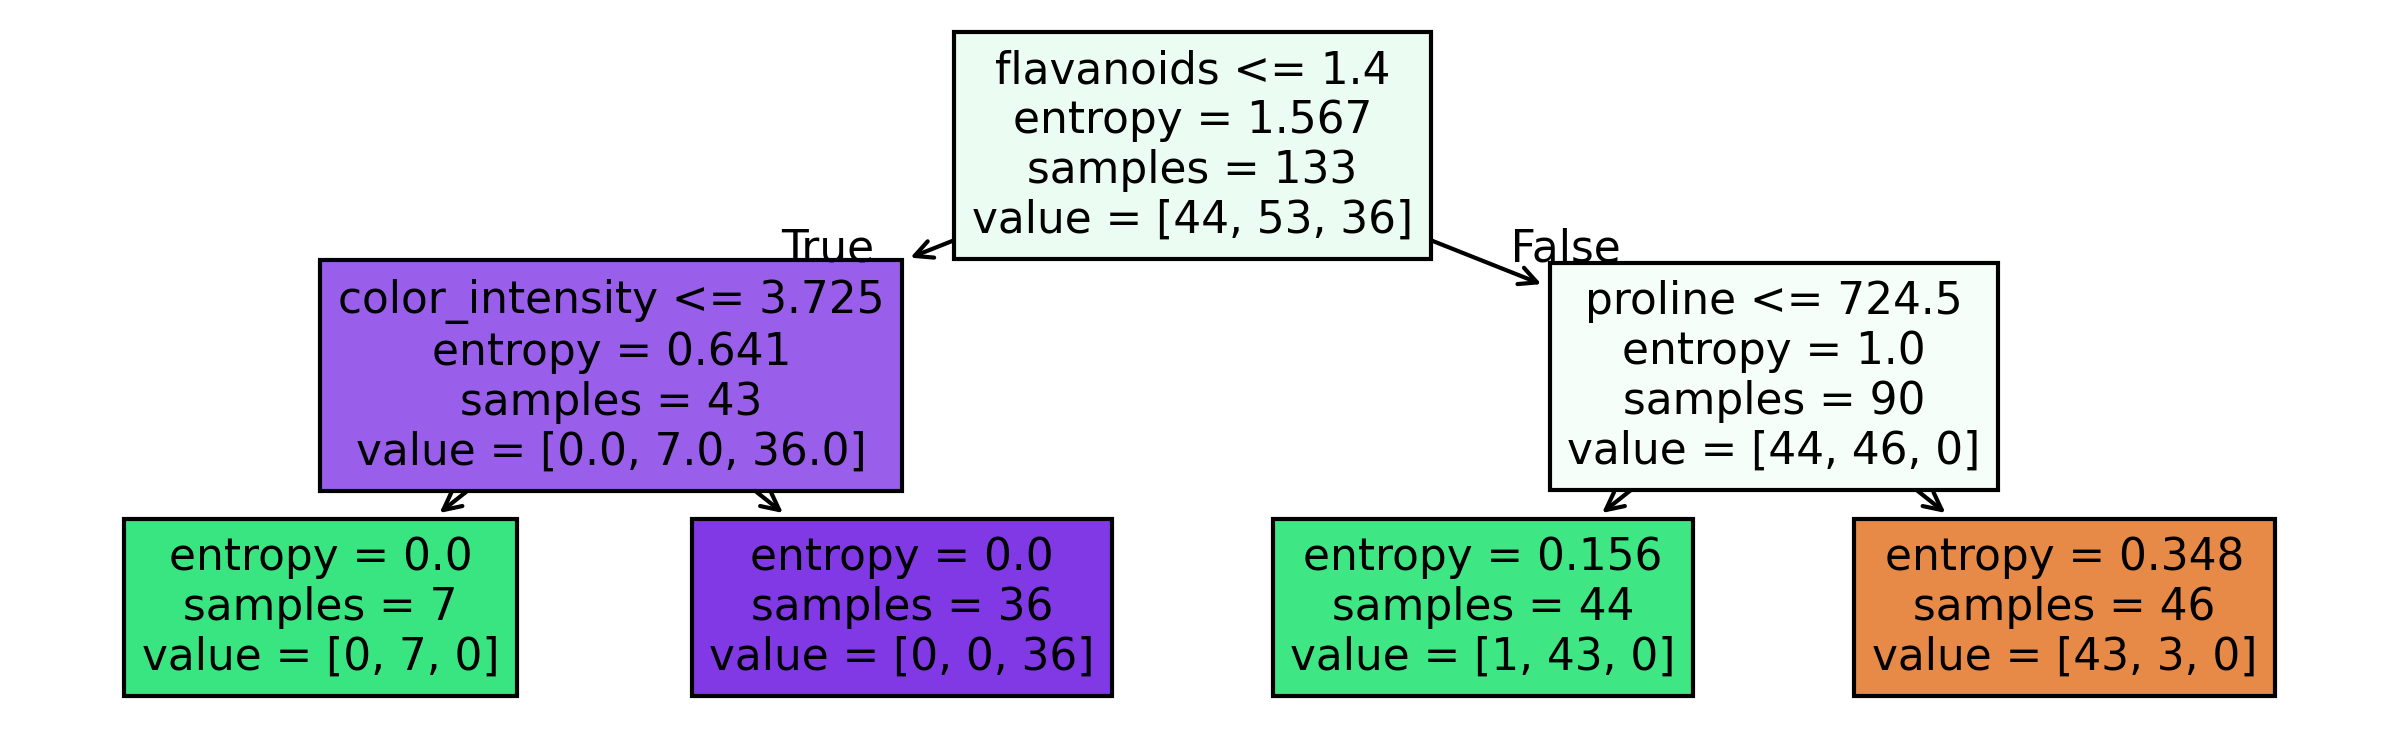

In [39]:
# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import plot_tree from sklearn, which visualizes the decision tree structure
from sklearn.tree import plot_tree

# Set the plot size and resolution for better readability
plt.figure(figsize=(10, 3), dpi=300)

# Plot the tree with feature names and colored nodes
tree_dot = plot_tree(tree, feature_names=wine.feature_names, filled=True)

# Display the plot
plt.show()

And just like that, with just two splits, our tree turned the chaotic, mixed dataset into almost entirely pure subgroupings. Now, we'll **increase the depth to three** and see if we can achieve all pure leaves. Of course, deeper trees **risk overfitting**, so we’ll keep an eye on test performance.


In [40]:
# Build the tree with max_depth=3, so three levels and criterion set to 'entropy'
# to split based on information gain, or reduction in impurity
tree_3 = DecisionTreeClassifier(max_depth=3, criterion='entropy')

# Fit the tree to the training set
tree_3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

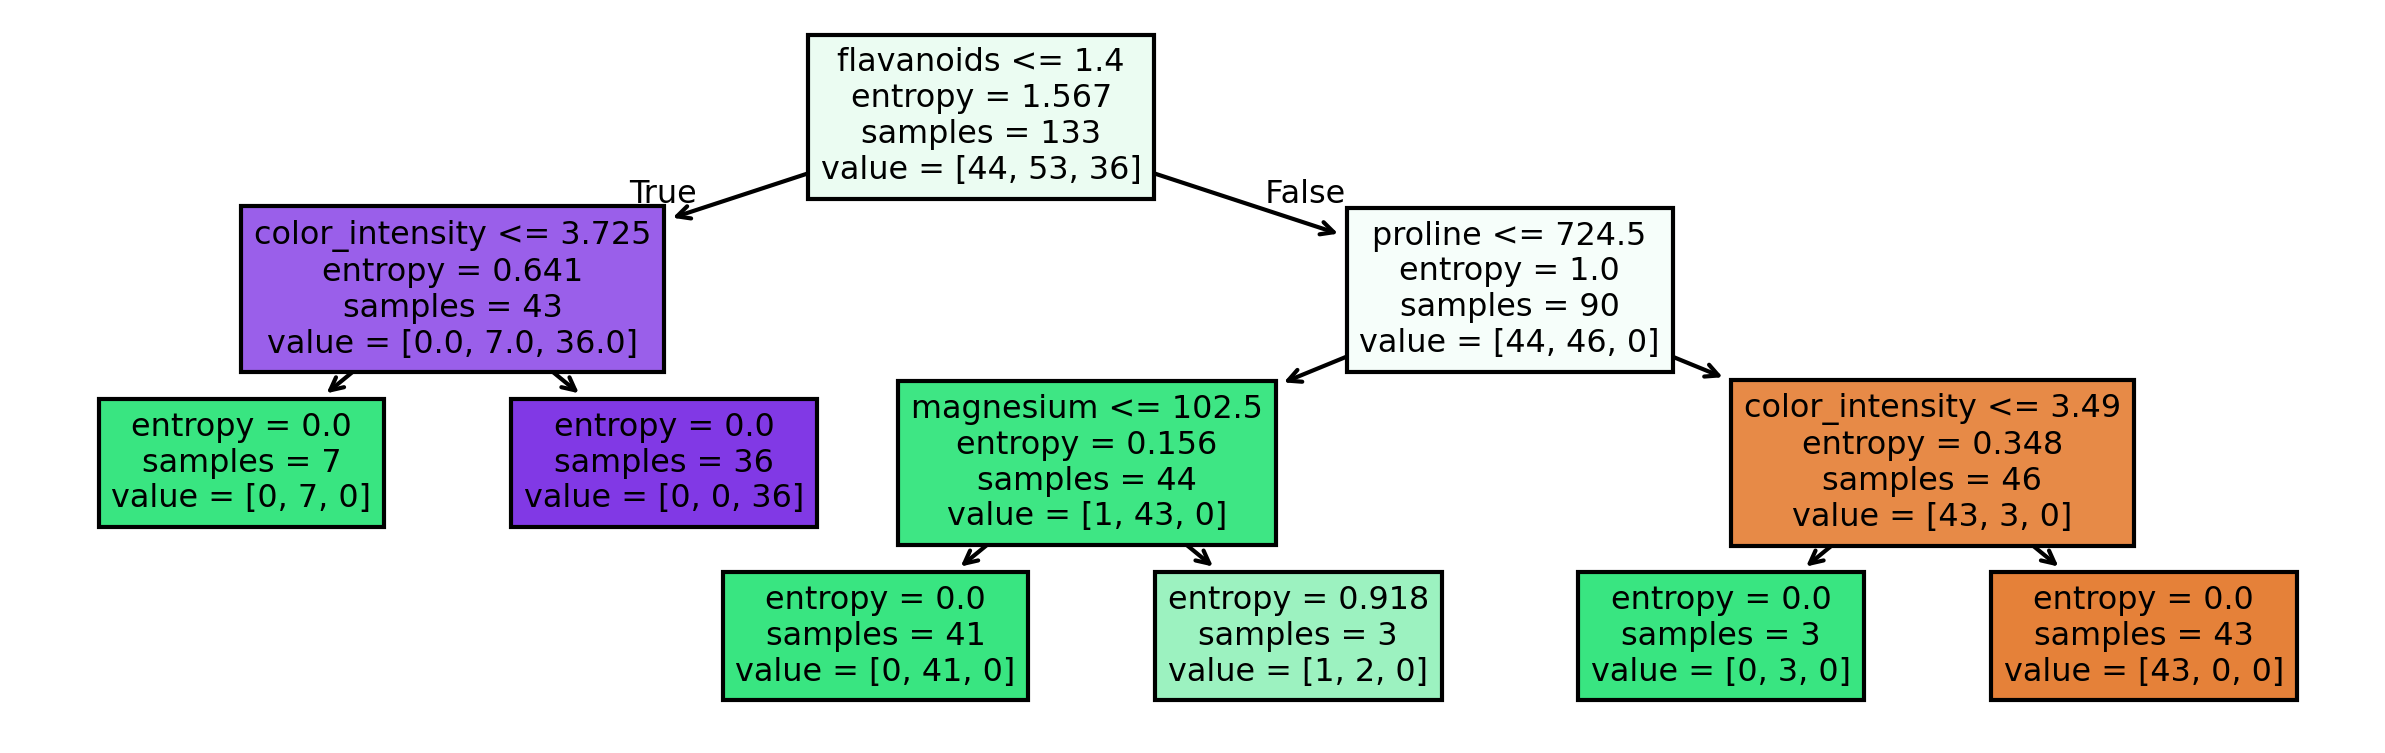

In [41]:
# Set the plot size and resolution for better readability
plt.figure(figsize=(10, 3), dpi=300)

# Plot 'tree_3' with feature names and colored nodes
tree_3_dot = plot_tree(tree_3, feature_names=wine.feature_names, filled=True)

# Display the plot
plt.show()

Our tree is more complicated, but it's unclear if it's actually *better*. So, instead of continuing to tune by hand, let’s try a more scalable approach: fit a fully grown decision tree (no depth limit) and visualize what happens when we let the model run wild.

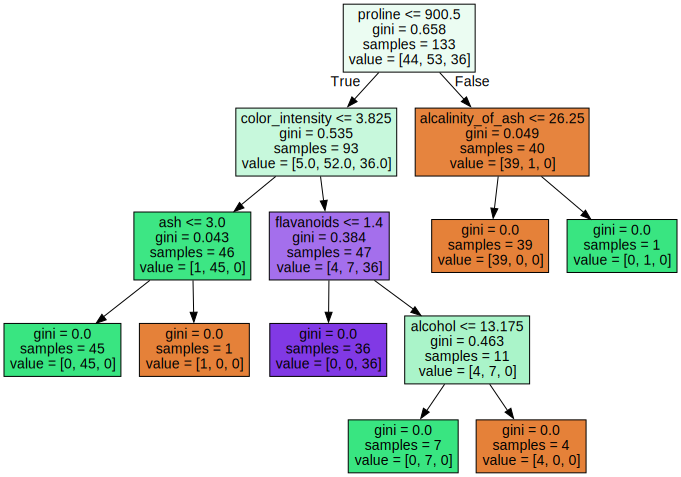

In [43]:
# Note: We import export_graphviz for visualizing the tree
# The high-level goal is to show a better or more complex tree
import graphviz

# Fit a decision tree classifier to the training data
# Note: There is no limit to maximum depth
tree_max = DecisionTreeClassifier().fit(X_train, y_train)

# Export the trained tree to DOT format -- a graph description language
tree_dot_max = export_graphviz(tree_max, out_file=None, feature_names=wine.feature_names, filled=True)

# Create a graphviz Source object to render the tree as a PNG image
graph = graphviz.Source(tree_dot_max, format="png")

# Render the image to a file called 'no_pruning.png' and clean up temporary files
graph.render(filename="no_pruning", cleanup=True)

# Display the graph
graph

This approach brought us a tree with all pure noted, but there's also significant change that we are overfitting, as we warned above. Let's check to see how the three respective trees perform on the test set.

## Evaluate tree performance and check feature importance

In [45]:
# Check the accuracy scores on the three trees
print("Depth 2 Accuracy:", tree.score(X_test, y_test))
print("Depth 3 Accuracy:", tree_3.score(X_test, y_test))
print("Depth Max Accuracy:", tree_max.score(X_test, y_test))

Depth 2 Accuracy: 0.9555555555555556
Depth 3 Accuracy: 0.9777777777777777
Depth Max Accuracy: 0.8888888888888888


We've hit a major **overfit alert**. Despite achieving pure leaves on the max depth tree, the **performance on the test set drops off a cliff**. That's textbook overfitting. The tree has memorized the training data but has lost its generalization power on unseen data.

Next up, let's see which features were most important to the decision tree that performed the best (depth=3).

In [46]:
# Use .feature_importances_ to get the importance of each feature
tree_3.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.02008269,
       0.        , 0.44199473, 0.        , 0.        , 0.2117804 ,
       0.        , 0.        , 0.32614219])

This, of course, isn't too interpretable. Let's plot the results for a more intuitive output.

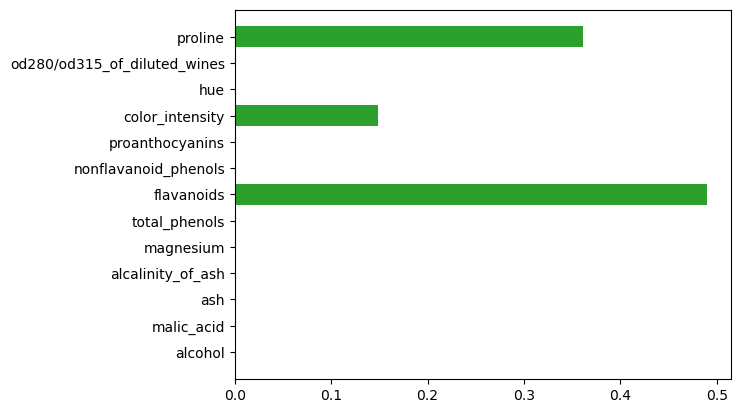

In [49]:
# Let's plot it for a more intuitive look
plt.barh(range(13), tree.feature_importances_)
plt.yticks(range(13), wine.feature_names)

# Display the plot
plt.show()

This maps on perfectly to what we saw when we originally plotted the tree. The most important features (`flavanoids`, `proline`, and `color_intensity`) correspond directly to the top nodes and first splits in the tree, driving the biggest reductions in impurity.

**An obvious question follows**: What *are* these features -- in the context of a glass of wine? 

- **flavonoids**: These not only give red wine its color, but also contribute to the wine's body and sometimes the tanin structure -- the stuff that makes your mouth feel a little dry with certain reds. More flavonoids usually means a richer, more robust wine.
- **proline**: An amino acid, or building block of protein, that's found in higher amounts in some wines. It doesn't impact the taste, but different grape varietires and regions have different amounts. So, it's almost like a little fingerprint of where the wine was made.
- **color_intensity**: How dark or rich the wine looks in your glass. Imagine a deep, bold Cabernet versus a lighter Pinot Noir -- this number captures that difference.

## Forget the tree, use the forest

Our tree with a depth of three is already performing quite impressively -- **nearly 98% accuracy on the test set**. But what if we could make it even better?

Enter the `RandomForetClassifier`. The classic ensemble learning method is intuitive, powerful, and just makes too much sense. Instead of relying on just one tree, why not call on the collective wisdom of an entire forest? 

This kind of classifier builds a bunch (think hundreds) of different decision trees, each trained on a random sample of the data with a random subset of features. The predictions are then combined to improve accuracy and reduce overfitting. So, instead of counting on a single tree, the whole forest gets to vote.

Let's see how the `RandomForestClassifier` does on our wine dataset.

In [56]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest -- starting with the default setting of 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf

RandomForestClassifier(random_state=0)

Next, we'll see how well the forest performed on the training and test sets.

In [57]:
# Check the accuracy on the training and test sets
print("Random Forest Train Accuracy:", rf.score(X_train, y_train))
print("Random Forest Test Accuracy:", rf.score(X_test, y_test))

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 1.0


So much for the forest. 

At this point, it's clear that we didn't actually need to bring in this sophisticated ensemble method. Those perfect scores on both the training and test sets indicate that the model essentially memorized the data, rather than truly "learning" patterns that would generalize to new, unseen data.

It's a remainder of a classic refrain in data science: **use the simplest tool that works**. You don't need a forest when a single tree does the job. Sometimes, *chaos is just a tree*.